<a href="https://colab.research.google.com/github/deathstar1/Exploration/blob/main/CNNMaxPoolK2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import cv2
import numpy as np
from scipy import misc
i = misc.ascent()

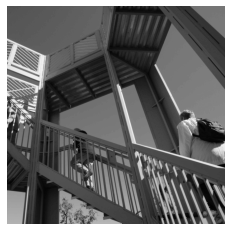

In [58]:
import matplotlib.pyplot as plt
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(i)
plt.show()

In [59]:
i_transformed =  np.array(i)
size_x = i_transformed.shape[0]
size_y = i_transformed.shape[1]
weight = 1

In [60]:
#filter = [[1,0 ,1] , [0 ,0, 1] , [1, 0 , 0]]
filter = [[0 ,0 ,1] , [0 ,1, 1] , [1, 1 , 1]]
# filter = [[1,0 ,1] , [1 ,1, 1] , [1, 0 , 0]]
# filter = [[0,-1 ,1] , [-1 ,0, 1] , [1, -1 , 0]]

In [61]:
for x in range(1,size_x - 1):
  for y in range(1 , size_y - 1):
    convolution = 0.0
    convolution = convolution + (i[x-1][y-1] * filter[0][0])
    convolution = convolution + (i[x][y-1] * filter[1][0])
    convolution = convolution + (i[x+1][y-1] * filter[2][0])
    convolution = convolution + (i[x-1][y] * filter[0][1])
    convolution = convolution + (i[x][y] * filter[1][1])
    convolution = convolution + (i[x+1][y] * filter[2][1])
    convolution = convolution + (i[x-1][y+1] * filter[0][2])
    convolution = convolution + (i[x][y+1] * filter[1][2])
    convolution = convolution + (i[x+1][y+1] * filter[2][2])
    convolution = convolution * weight

    if(convolution <0):
      convolution = 0
    if(convolution >255):
      convolution = 255
    i_transformed[x,y] = convolution

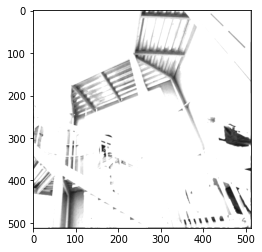

In [62]:
plt.gray()
plt.grid(False)
plt.imshow(i_transformed)
plt.show()

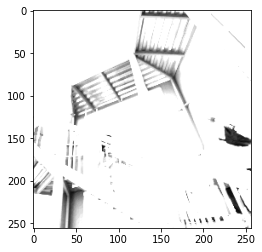

In [63]:

new_x = int(size_x /2)
new_y = int(size_y /2)

new_image = np.zeros((new_x,new_y))
for xi in range(0,size_x ,2):
  for yi in range(0,size_y, 2):
    pixels = []
    pixels.append(i_transformed[xi , yi])
    pixels.append(i_transformed[xi , yi+1])
    pixels.append(i_transformed[xi+1 ,yi])
    pixels.append(i_transformed[xi+1 ,yi+1])
    new_image[int(xi/2),int(yi/2)] =  max(pixels)

plt.gray()
plt.grid(False)
plt.imshow(new_image)
plt.show()